In [1]:
# TODO whole thing
import sys
sys.path.append("../Helper_Templates/")
from P_to_GPH_lat_lon import P_to_GPH_lat_lon
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
datapath1 = "/resstore/b0154/Data/chmmvg/simulations/f.e22.FWmaHIST.f19_f19.arc4.002_KDYN/atm/Kdyn_HIST_MIF_div2_2000_2012/"
filestr_ds1 = "f.e22.FWmaHIST.f19_f19.arc4.002.cam.h1.2011-05.nc"

ds1 = xr.open_mfdataset(datapath1 + filestr_ds1).load() # Cannot perform zonal means when using mfdataset without load()
ds1 = ds1.sel(lat=-90,method="nearest")

CPU times: user 245 ms, sys: 162 ms, total: 407 ms
Wall time: 401 ms


/home/home02/phymku/.conda/envs/mmkenv/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [3]:
ds1

<xarray.Dataset>
Dimensions:               (lon: 144, lev: 70, ilev: 71, time: 1, nbnd: 2)
Coordinates:
    lat                   float64 -90.0
  * lon                   (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lev                   (lev) float64 5.96e-06 9.827e-06 ... 976.3 992.6
  * ilev                  (ilev) float64 4.5e-06 7.42e-06 ... 985.1 1e+03
  * time                  (time) object 2011-06-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/59)
    gw                    float64 0.0001367
    hyam                  (lev) float64 5.96e-09 9.827e-09 ... 0.001989 0.0
    hybm                  (lev) float64 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0                    float64 1e+05
    hyai                  (ilev) float64 4.5e-09 7.42e-09 1.223e-08 ... 0.0 0.0
    hybi                  (ilev) float64 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    ...                    ...
    k_tot_tot             (time, ilev, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    k_wave_orog_tot_BETA  (time, lev, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    k_wave_tot            (time, lev, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    var_gwt_tot           (time, lev, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xi_orog_tot_BETA      (time, lev, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xi_tot                (time, lev, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e22.FWmaHIST.f19_f19.arc4.002
    logname:           chmmvg
    host:              d9s0b2.arc4.leed
    initial_file:      /nobackup/chmmvg/FWmaHIST_2deg_restartfiles/f.e21.FWma...
    topography_file:   /nobackup/chmmvg/cesm2_inputdata//atm/cam/topo/fv_1.9x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [4]:
ds1 = ds1.mean(dim="lon")
ds1

<xarray.Dataset>
Dimensions:               (lev: 70, ilev: 71, time: 1, nbnd: 2)
Coordinates:
    lat                   float64 -90.0
  * lev                   (lev) float64 5.96e-06 9.827e-06 ... 976.3 992.6
  * ilev                  (ilev) float64 4.5e-06 7.42e-06 ... 985.1 1e+03
  * time                  (time) object 2011-06-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/59)
    gw                    float64 0.0001367
    hyam                  (lev) float64 5.96e-09 9.827e-09 ... 0.001989 0.0
    hybm                  (lev) float64 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0                    float64 1e+05
    hyai                  (ilev) float64 4.5e-09 7.42e-09 1.223e-08 ... 0.0 0.0
    hybi                  (ilev) float64 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    ...                    ...
    k_tot_tot             (time, ilev) float32 0.0 1.528e-15 ... 0.0 0.0
    k_wave_orog_tot_BETA  (time, lev) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    k_wave_tot            (time, lev) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    var_gwt_tot           (time, lev) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xi_orog_tot_BETA      (time, lev) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xi_tot                (time, lev) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [5]:
ds1 = P_to_GPH_lat_lon(ds1)

Using P to GPH for structured lat lon grid
WARNING 
    - Takes a long time for large datasets 
    - Any masked dimensions will be removed 
      e.g. ds.sel(lat=90...) removes lat as dim and makes it coord. 
      This script drops all coordinates that aren't dimensions 
Integrating it, 0  lat  0  lon  0  lev  0  progress  100.00  % 
That took  0.38 seconds


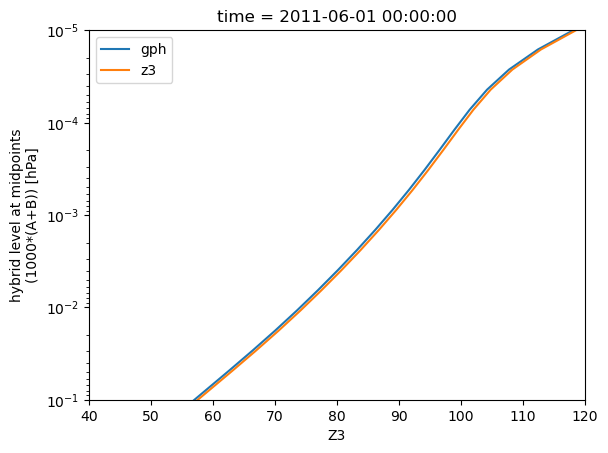

In [6]:
gph = ds1['gph']
gph.plot(y="lev",yscale="log",ylim=[1e-1,1e-5],xlim=[40,120],label='gph')
z3 = ds1['Z3']/1e3
z3.plot(y="lev",yscale="log",ylim=[1e-1,1e-5],xlim=[40,120],label='z3')
plt.legend()

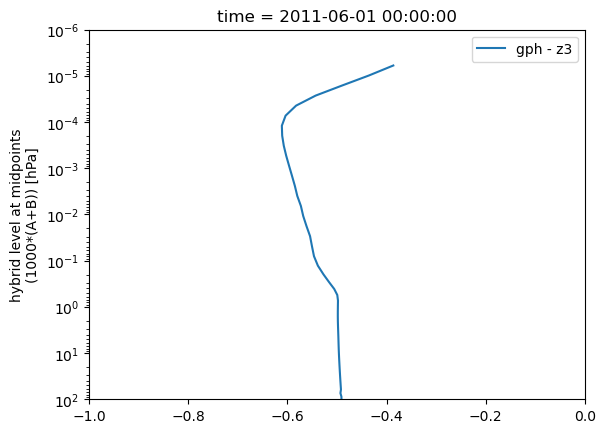

In [8]:
diff = gph - z3
diff.plot(y="lev",yscale="log",ylim=[1e2,1e-6],xlim=[-1,0],label='gph - z3')
plt.legend()